In [93]:
import numpy as np
import cv2 as cv
from tensorflow.keras.layers import Conv2D, Input, Dense, Flatten, Reshape, Conv2DTranspose
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [4]:
directory = r"F:\Work\Xray_Data\FCI_10_11_2022"
startFile = "ImageSeq_200.tiff"
endFile = "ImageSeq_300.tiff"

In [50]:
img = cv.imread(directory + '/' + startFile)
w, h, c = img.shape

In [78]:
def img_preprocess(imgin):
    img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    img_gray = cv.resize(img_gray,(w//8, h//8))
    return img_gray.astype('float32')/255

In [99]:
startind = 200
endind = 250
xtrain = np.zeros(shape=((endind-startind), w//8, h//8))
for i in range(startind,endind):
    Filename = 'ImageSeq_' + str(i) + '.tiff'
    img = cv.imread(directory + '/' + Filename)
    xtrain[i-startind,:,:] = img_preprocess(img)
    #xtrain = np.append(xtrain, img_gray, axis=0) 
xtrain = np.expand_dims(xtrain, axis=-1)

In [27]:
latent_dim = 128
input_shape = (img_gray.shape[0], img_gray.shape[1], 1)

model = Sequential(
[
    #Encoder
    layers.Input(shape=input_shape),
    layers.Conv2D(32, kernel_size = 3, strides=2, activation='relu')
    layers.Conv2D(64, kernel_size = 3, strides=2, activation='relu')
    layers.Flatten()
    layers.Dense(latent_dim)
    #Decoder
    
    
    
])
model.add(Input(1024,1024,3))
model.add(conv2d())

In [68]:
inputs = Input(shape=input_shape)
layer1 = Conv2D(32, kernel_size = 3, strides = 2, activation = 'relu', padding='same')(inputs)
layer2 = Conv2D(64, kernel_size = 3, strides = 2, activation = 'relu', padding='same')(layer1)
layer3 = Flatten()(layer2)
layer4 = Dense(latent_dim)(layer3)

In [72]:
inputs, layer1, layer2, layer3, layer4 

(<KerasTensor: shape=(None, 128, 128, 1) dtype=float32 (created by layer 'input_4')>,
 <KerasTensor: shape=(None, 64, 64, 32) dtype=float32 (created by layer 'conv2d_6')>,
 <KerasTensor: shape=(None, 32, 32, 64) dtype=float32 (created by layer 'conv2d_7')>,
 <KerasTensor: shape=(None, 65536) dtype=float32 (created by layer 'flatten_3')>,
 <KerasTensor: shape=(None, 128) dtype=float32 (created by layer 'dense_8')>)

In [69]:
dlayer1 = Dense(layer3.shape[1])(layer4)
dlayer2 = Reshape((layer2.shape[1], layer2.shape[2], layer2.shape[3]))(dlayer1)
dlayer3 = Conv2DTranspose(32, kernel_size=3, strides=2, activation='relu', padding='same')(dlayer2)
dfinal = Conv2DTranspose(1, kernel_size=3, strides=2, activation='sigmoid', padding='same')(dlayer3)

In [100]:
autoenc = Model(inputs, dfinal)

In [101]:
autoenc.compile(optimizer = Adam(learning_rate=0.0002), loss='binary_crossentropy')

In [103]:
history = autoenc.fit(xtrain, xtrain, epochs=50, batch_size=128)

Epoch 1/50
1/1 [==============================] - 11s 11s/step - loss: 0.5023
Epoch 2/50
1/1 [==============================] - 1s 1s/step - loss: 0.4833
Epoch 3/50
1/1 [==============================] - 1s 1s/step - loss: 0.4708
Epoch 4/50
1/1 [==============================] - 1s 1s/step - loss: 0.4648
Epoch 5/50
1/1 [==============================] - 1s 1s/step - loss: 0.4629
Epoch 6/50
1/1 [==============================] - 1s 1s/step - loss: 0.4618
Epoch 7/50
1/1 [==============================] - 1s 1s/step - loss: 0.4587
Epoch 8/50
1/1 [==============================] - 1s 1s/step - loss: 0.4528
Epoch 9/50
1/1 [==============================] - 1s 1s/step - loss: 0.4448
Epoch 10/50
1/1 [==============================] - 1s 1s/step - loss: 0.4362
Epoch 11/50
1/1 [==============================] - 1s 1s/step - loss: 0.4287
Epoch 12/50
1/1 [==============================] - 1s 1s/step - loss: 0.4234
Epoch 13/50
1/1 [==============================] - 1s 1s/step - loss: 0.4204
Epoch 

In [71]:
dlayer1, dlayer2, dlayer3, dfinal

(<KerasTensor: shape=(None, 65536) dtype=float32 (created by layer 'dense_9')>,
 <KerasTensor: shape=(None, 32, 32, 64) dtype=float32 (created by layer 'reshape_4')>,
 <KerasTensor: shape=(None, 64, 64, 32) dtype=float32 (created by layer 'conv2d_transpose_5')>,
 <KerasTensor: shape=(None, 128, 128, 1) dtype=float32 (created by layer 'conv2d_transpose_6')>)

In [104]:
img_test = img_preprocess(cv.imread(directory + '/ImageSeq_' + str(250) + '.tiff'))
img_test = np.expand_dims(img_test, axis=-1)
img_predict = autoenc.predict(np.expand_dims(img_test, axis=0))

1/1 [==============================] - 33s 33s/step


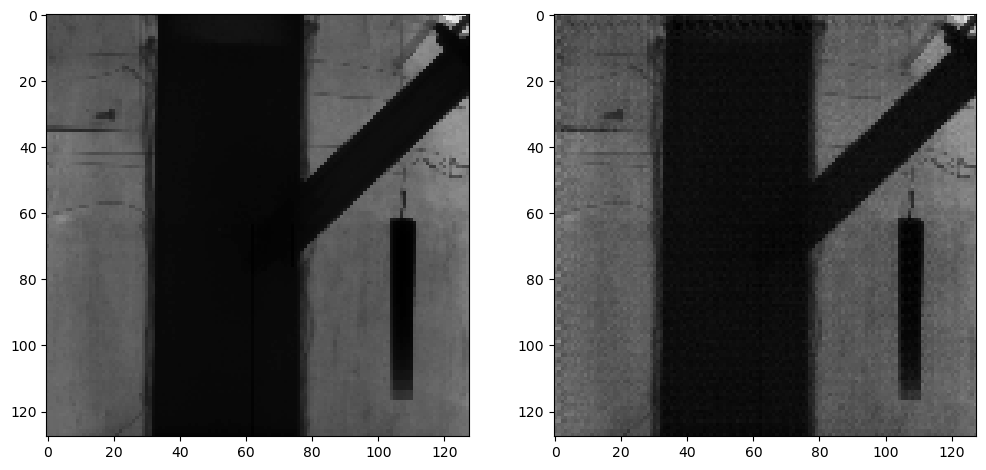

In [105]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(img_test[:,:,0], cmap='gray')
plt.subplot(1,2,2)
plt.imshow(img_predict[0,:,:,0], cmap='gray')

In [92]:
img_predict.shape

(1, 128, 128, 1)

In [95]:
img_test.shape

(128, 128, 1)